* Convergence of Time series

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import seaborn as sns
%matplotlib inline

In [3]:
class diff_eqt:
    """
    创建差分方程:默认形式为 y_t = a_0 + a_1*y_(t-1) + a_2 * y_(t-2) + ...
    实例化需要参数：
    initial(int/float/list): 差分方程的初始值
    param(list):[a_0,a_1,a_2,...] ，其中a_0=0时也需要输入 
    """
    def __init__(self,initial = None,param=None):
        if type(initial) == list:
            self.initial = initial
        else:
            self.initial = [initial]
        self.seq = copy.deepcopy(self.initial)
        self.param = param
        self.order = len(self.initial)
        self.rand_seq = None
        
    def get_seq(self,t):
        """
        获取长度为t的差分序列
        """
        self.seq = copy.deepcopy(self.initial)
        while t>self.order:
            t -= 1
            y_t = self.param[0]
            for i in range(1,self.order+1):
                y_t += self.seq[-i] * self.param[i]
            y_t += self.param[0]
            self.seq.append(y_t)
        return self.seq
    
    def get_seq_rand(self,t):
        """
        获取长度为t的随机差分序列，其中，随机项为N(0,1)
        """
        self.seq = copy.deepcopy(self.initial)
        e_t = np.random.randn(t)
        self.rand_seq = self.get_seq(t) + e_t
        return self.rand_seq
    
    def get_param(self):
        """
        获取差分方程的参数列表
        """
        return self.param

    def get_eqt(self):
        """
        打印差分方程的形式
        """
        if self.param != 0:
            y_t = "y_t = "
        else:
            y_t = "y_t = " + str(self.param[0])
        for i in range(1,self.order+1):
            if self.param[i] == 0:
                continue
            t_i = 't-{}'.format(i)
            a =  str(self.param[i]) + "*" + ('y_{'+t_i+'}')
            if self.param[i] <0:
                y_t += a
            if self.param[i]>0:
                y_t += "+" + a
        y_t += "+" + "\epsilon_t"
        return y_t

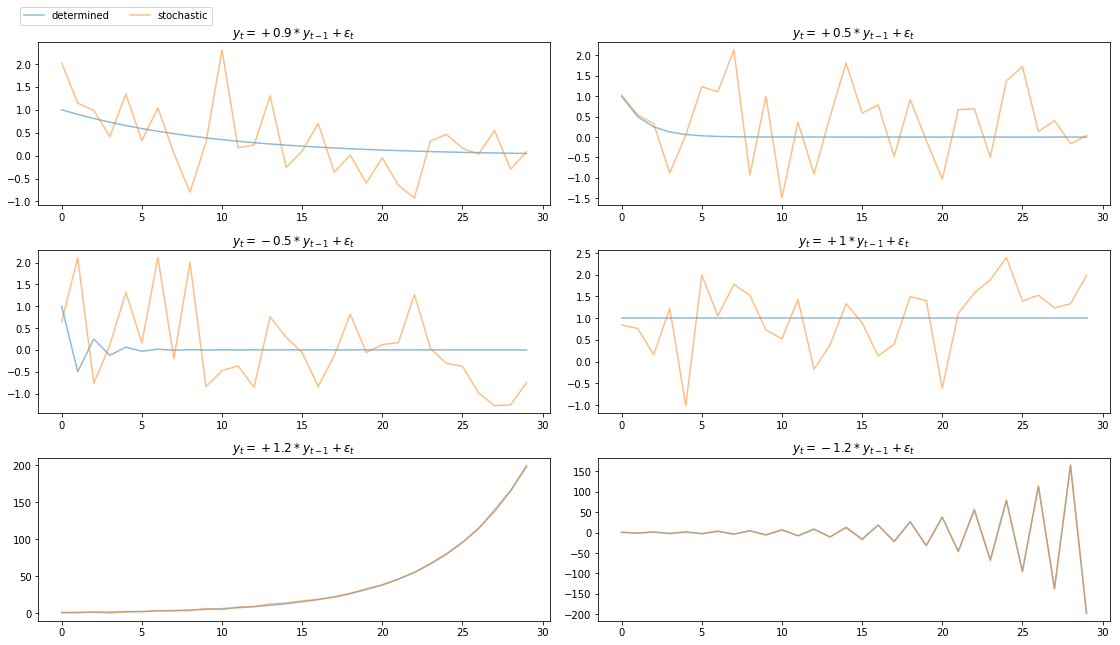

In [4]:
initial = 1
param = [[0,0.9],[0,0.5],[0,-0.5],[0,1],[0,1.2],[0,-1.2]]
axis = [0,0,1,1,2,2]
fig,axes = plt.subplots(3,2,figsize = (16,9))
for par in range(len(param)):
    y_t = diff_eqt(initial,param[par])
    seq = y_t.get_seq(30)
    ran_seq = y_t.get_seq_rand(30)
    axes[axis[par],par%2].plot(range(30),seq,label = "determined",alpha = 0.5)
    axes[axis[par],par%2].plot(range(30),ran_seq,label = "stochastic",alpha = 0.5)
    axes[axis[par],par%2].set_title(r"${}$".format(y_t.get_eqt()))
axes[0,0].legend(bbox_to_anchor=(0.35, 1.25),ncol=2)
fig.tight_layout()#调整整体空白

In [5]:
import statsmodels.api as sm
from statsmodels.tsa import stattools

In [6]:
class ARMA:
    """
    创建差分方程:默认形式为 y_t = a_0 + a_1*y_(t-1) + a_2 * y_(t-2) + ...
    实例化需要参数：
    initial(int/float/list): 差分方程的初始值
    param(list):[a_0,a_1,a_2,...] ，其中a_0=0时也需要输入 
    """
    def __init__(self,p=None,q=None,initial=None, AR=None,MA = None):
        self.p = p
        self.q = q
        if type(initial) == list:
            self.initial = initial
        else:
            self.initial = [initial]
        self.AR = AR
        self.MA = MA
        
    def get_seq(self,t):
        """
        获取长度为t的差分序列
        """
        self.seq = copy.deepcopy(self.initial)
        e_t = np.random.randn(t)
        while t>self.p:
            t -= 1
            y_t = self.AR[0]
            for i in range(1,self.p+1):
                y_t += self.seq[-i] * self.AR[i]
            for i in range(1,self.q+1):
                y_t += self.MA[i] * e_t[-i]
            self.seq.append(y_t)
        return self.seq

In [53]:
y1 = ARMA(1,1)
y1.initial = [0]
y1.AR = [0,0.9]
y1.MA = [1,0.5]

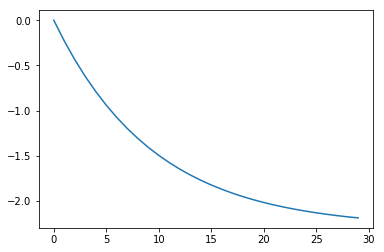

In [54]:
plt.plot(y1.get_seq(30))

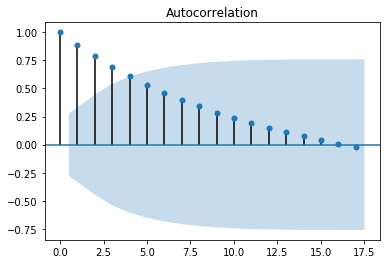

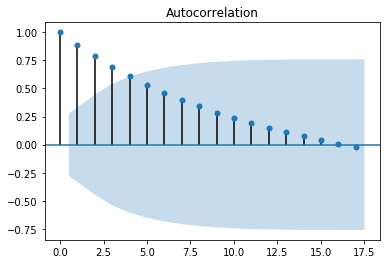

In [59]:
sm.graphics.tsa.plot_acf(np.array(y1.get_seq(50)))

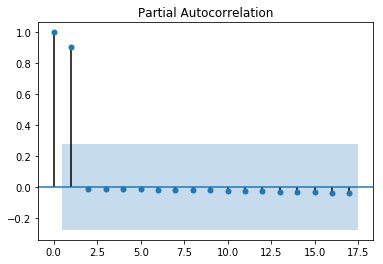

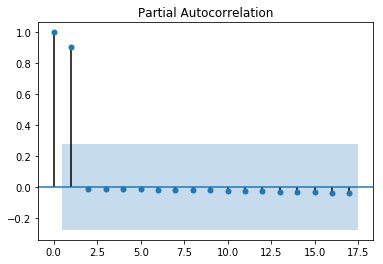

In [58]:
sm.graphics.tsa.plot_pacf(np.array(y1.get_seq(50)))